In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval, ImageNormalize
from  matplotlib.colors import LogNorm
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from tqdm.notebook import trange

In [6]:
def padding(files, y, x):

    width = files.shape[1]
    height = files.shape[0]

    output = np.zeros((y,x))
    
    xpos = int(x/2 - width/2)
    ypos = int(y/2 - height/2)
    
    output[ypos:height+ypos,xpos:width+xpos] = files
    
    return output

# Lecture image

In [12]:
path_img = "/home/frank/astronomie/JWST/orion_bar/jw01288-o001_t011_nircam_clear-f187n_i2d.fits"
img=fits.open(path_img)
img_data=img[0].data
header=img[0].header

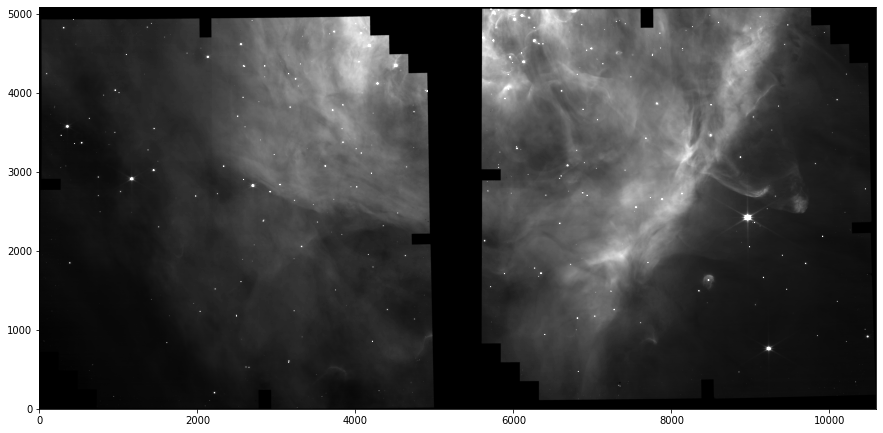

In [13]:
%matplotlib inline
plt.figure(figsize=(15,15))
norm = ImageNormalize(img_data, interval=ZScaleInterval())
plt.imshow(img_data, norm=norm, cmap='gray', origin='lower')

In [14]:
img_data.shape

(5090, 10594)

In [22]:
def binning_2x(data) : 
    y,x = data.shape[0],data.shape[1]
    data_bin = []
    for i in trange(0,y,2) :
        data_b_x = []
        for j in range(0,x,2) :
            data_b_x.append(np.mean([data[i,j],data[i+1,j],data[i,j+1],data[i+1,j+1]]))
        data_bin.append(data_b_x)
    return data_bin

In [23]:
ni = binning_2x(img_data)

  0%|          | 0/2545 [00:00<?, ?it/s]

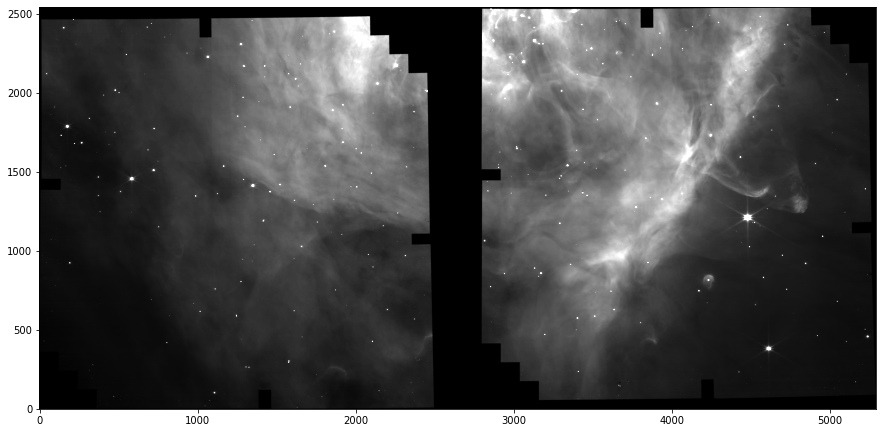

In [24]:
%matplotlib inline
plt.figure(figsize=(15,15))
norm = ImageNormalize(ni, interval=ZScaleInterval())
plt.imshow(ni, norm=norm, cmap='gray', origin='lower')

In [25]:
ni =np.array(ni)

In [26]:
ni.shape

(2545, 5297)

In [28]:
fits.writeto('f187nw.fits',ni)

# Combine image

In [3]:
path_g = "/home/frank/astronomie/JWST/orion_bar/jw01288-o001_t011_nircam_f444w-f470n_i2d.fits"
path_r = "/home/frank/astronomie/JWST/orion_bar/jw01288-o001_t011_nircam_clear-f335m_i2d.fits"
path_b = "/home/frank/astronomie/JWST/orion_bar/jw01288-o001_t011_nircam_clear-f277w_i2d.fits"

img=fits.open(path_r)
img_r=img[0].data

img=fits.open(path_g)
img_g=img[0].data

img=fits.open(path_b)
img_b=img[0].data

In [4]:
print(img_r.shape,img_g.shape,img_b.shape)

(2463, 5220) (2461, 5209) (2461, 5213)


In [7]:
maxX = max(img_r.shape[0],img_g.shape[0],img_b.shape[0]) 
maxY = max(img_r.shape[1],img_g.shape[1],img_b.shape[1]) 

lenX = int(maxX + maxX/100)
lenY = int(maxY + maxY/100)

img_r = padding(img_r,lenX,lenY)
img_g = padding(img_g,lenX,lenY)
img_b = padding(img_b,lenX,lenY)    

In [8]:
print(img_r.shape,img_g.shape,img_b.shape)

(2487, 5272) (2487, 5272) (2487, 5272)


In [7]:
img_rgb=np.dstack((img_r.astype(int),img_g.astype(int),img_b.astype(int))) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


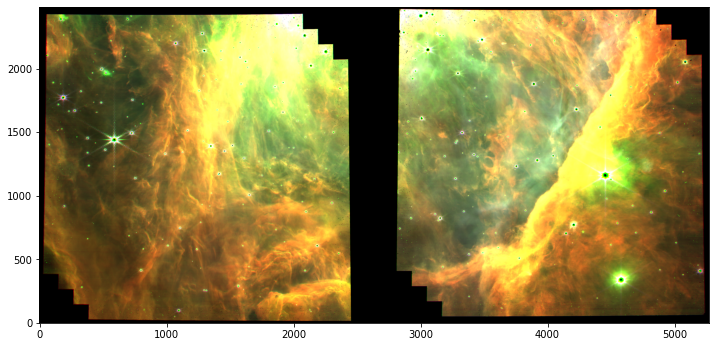

In [8]:
%matplotlib inline
plt.figure(figsize=(12,12))
#norm = ImageNormalize(img_rgb, interval=ZScaleInterval())
#plt.imshow(img_rgb, norm=norm, origin='lower')
plt.imshow(img_rgb,origin='lower')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


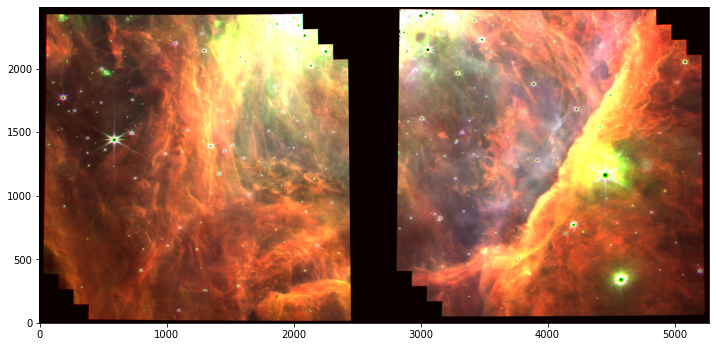

In [9]:
n_img_g = 0.8*img_g-10
n_img_r = 1*img_r+10
n_img_b = 1.2*img_b-5
n_img_rgb=np.dstack((n_img_r.astype(int),n_img_g.astype(int),n_img_b.astype(int))) 

%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(n_img_rgb,origin='lower')
#plt.savefig('orion_py2',dpi=600)
plt.show()

# New combine 

In [3]:
path_g = "/home/frank/astronomie/JWST/orion_bar/jw01288-o001_t011_nircam_f444w-f470n_i2d.fits"
path_r = "/home/frank/astronomie/JWST/orion_bar/jw01288-o001_t011_nircam_clear-f335m_i2d.fits"
path_b = "/home/frank/astronomie/JWST/orion_bar/f187nw.fits"

img=fits.open(path_r)
img_r=img[0].data

img=fits.open(path_g)
img_g=img[0].data

img=fits.open(path_b)
img_b=img[0].data

In [4]:
print(img_r.shape,img_g.shape,img_b.shape)

(2463, 5220) (2461, 5209) (2545, 5297)


In [5]:
maxX = max(img_r.shape[0],img_g.shape[0],img_b.shape[0]) 
maxY = max(img_r.shape[1],img_g.shape[1],img_b.shape[1]) 

lenX = int(maxX + maxX/100)
lenY = int(maxY + maxY/100)

img_r = padding(img_r,lenX,lenY)
img_g = padding(img_g,lenX,lenY)
img_b = padding(img_b,lenX,lenY)    

In [6]:
print(img_r.shape,img_g.shape,img_b.shape)

(2570, 5349) (2570, 5349) (2570, 5349)


In [7]:
img_rgb=np.dstack((img_r.astype(int),img_g.astype(int),img_b.astype(int))) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


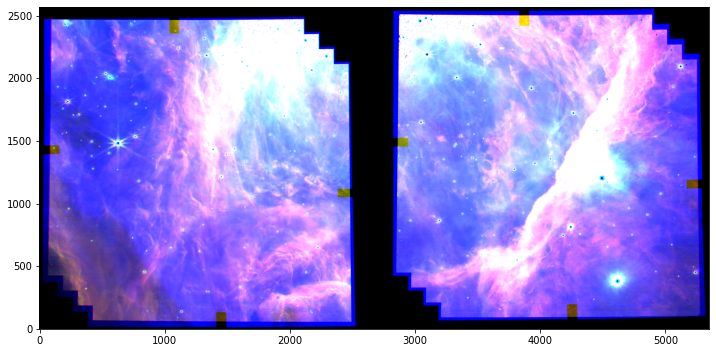

In [8]:
%matplotlib inline
plt.figure(figsize=(12,12))
#norm = ImageNormalize(img_rgb, interval=ZScaleInterval())
#plt.imshow(img_rgb, norm=norm, origin='lower')
plt.imshow(img_rgb,origin='lower')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


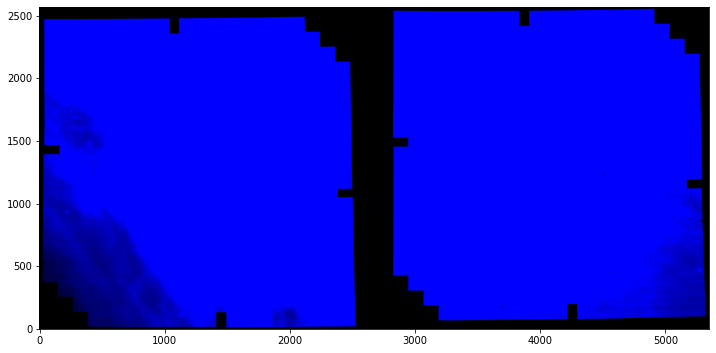

In [14]:
n_img_g = 0*img_g-0
n_img_r = 0*img_r+0
n_img_b = 1*img_b-0
n_img_rgb=np.dstack((n_img_r.astype(int),n_img_g.astype(int),n_img_b.astype(int))) 

%matplotlib inline
plt.figure(figsize=(12,12))
plt.imshow(n_img_rgb,origin='lower')
#plt.savefig('orion_py2',dpi=600)
plt.show()